# **Emotion Research Analysis Report**

### Research Question To Be Evaluated
-----------------
How are emotional valence and arousal distributed across a set of labeled speech audio files, and what does this reveal about the emotional diversity and balance in the dataset?


### **Introduction**
------------
In affective computing and speech emotion research, understanding the distribution of emotional attributes such as valence (pleasantness) and arousal (energy) is crucial for both analysis and model development. This study analyzes a collection of speech audio files, each labeled with valence and arousal values derived from acoustic features. By visualizing and summarizing these values, we aim to assess the emotional diversity, identify any biases or clusters, and provide insights for future dataset curation or model training.


### What the Values Mean on the Spectrum
------------------------------------

- **Valence** measures how positive or negative an emotion is:
    - **-1**: Very negative (e.g., sadness, anger)
    - **0**: Neutral (neither positive nor negative)
    - **1**: Very positive (e.g., happiness, excitement)
- **Arousal** measures the intensity or energy of an emotion:
    - **-1**: Very calm or low energy (e.g., tiredness, relaxation)
    - **0**: Neutral or moderate energy
    - **1**: Very energetic or high arousal (e.g., excitement, anger)



### Typical emotional quadrants in the valence-arousal space:
------------------------------------

- **High Valence, High Arousal**: Excited, elated
- **High Valence, Low Arousal**: Calm, relaxed, content
- **Low Valence, High Arousal**: Angry, fearful, anxious
- **Low Valence, Low Arousal**: Sad, bored, depressed


In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
folder = 'Reference_Audio-Updated'
folder = os.path.join(os.getcwd(), folder)

In [5]:
pattern = r'Reference_v([\-\d\.]+)_a([\-\d\.]+)\.wav'
data = []
for fname in os.listdir(folder):
    match = re.match(pattern, fname)
    if match:
        valence = float(match.group(1))
        arousal = float(match.group(2))
        data.append({'file': fname, 'valence': valence, 'arousal': arousal})


In [6]:
# Create DataFrame
df = pd.DataFrame(data)
print("\nDataFrame of files and their valence/arousal:")
print(df)


DataFrame of files and their valence/arousal:
                            file  valence  arousal
0   Reference_v-0.445_a1.000.wav   -0.445    1.000
1  Reference_v-1.000_a-0.205.wav   -1.000   -0.205
2  Reference_v-0.042_a-0.217.wav   -0.042   -0.217
3   Reference_v1.000_a-1.000.wav    1.000   -1.000


<ipython-input-9-adef45459174>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df))


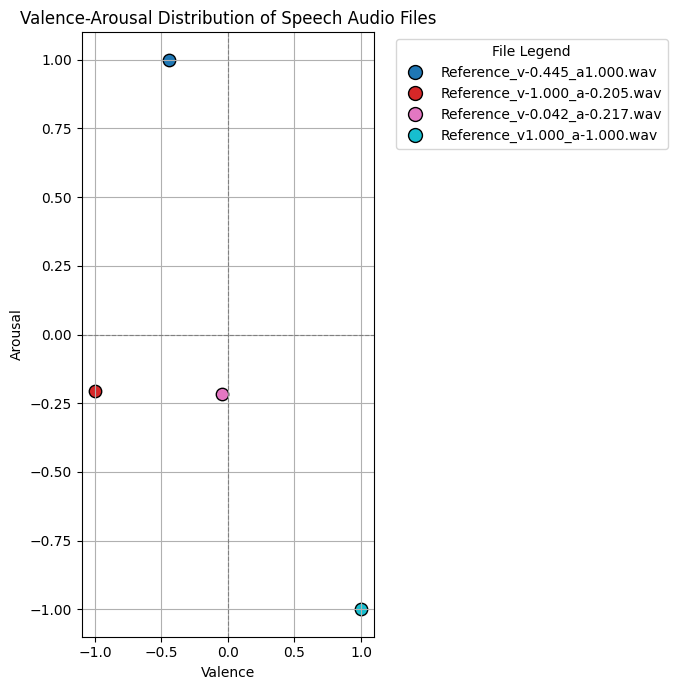

In [9]:
# Scatter Plot: Valence vs. Arousal (each file unique color with legend)
import itertools
colors = plt.cm.get_cmap('tab10', len(df))
plt.figure(figsize=(7,7))
legend_handles = []
for idx, (i, row) in enumerate(df.iterrows()):
    color = colors(idx)
    plt.scatter(row['valence'], row['arousal'], color=color, label=row['file'], s=80, edgecolor='black')
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=row['file'], markerfacecolor=color, markersize=10, markeredgecolor='black'))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Valence-Arousal Distribution of Speech Audio Files')
plt.grid(True)
plt.legend(handles=legend_handles, title='File Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### **Scatter Plot: Valence vs. Arousal**
   - **Description:** Each audio file is a colored dot in a 2D space (valence x arousal), with a legend matching each color to a file.
   - **Inference:** Reveals the spread and clustering of emotional content. Clusters or isolated points indicate whether the dataset is broad or concentrated emotionally.


In [10]:
# Statistical Summary
print("\nStatistical summary:")
print(df[['valence', 'arousal']].describe())


Statistical summary:
        valence   arousal
count  4.000000  4.000000
mean  -0.121750 -0.105500
std    0.844689  0.825549
min   -1.000000 -1.000000
25%   -0.583750 -0.412750
50%   -0.243500 -0.211000
75%    0.218500  0.096250
max    1.000000  1.000000


#### **Statistical Summary**
   - **Description:** Summary statistics (mean, std, min, max, quartiles) for valence and arousal.
   - **Inference:** Quantifies the central tendency and spread. A small std means similar emotions; a large range means diversity.

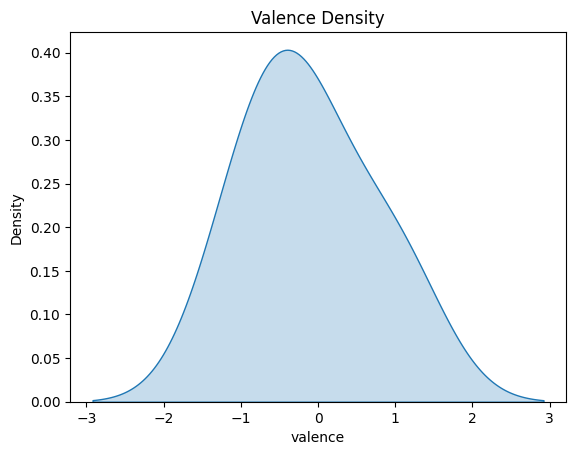

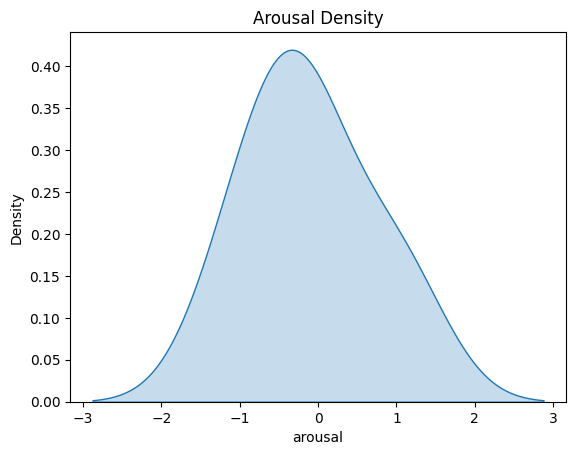

In [12]:
#KDE (Density) Plot
import seaborn as sns
sns.kdeplot(df['valence'], fill=True)
plt.title('Valence Density')
plt.show()
sns.kdeplot(df['arousal'], fill=True)
plt.title('Arousal Density')
plt.show()

#### **KDE (Density) Plots**
   - **Description:** Smoothed version of histograms for valence and arousal.
   - **Inference:** Highlights the most probable emotional values and subtle distribution structure.

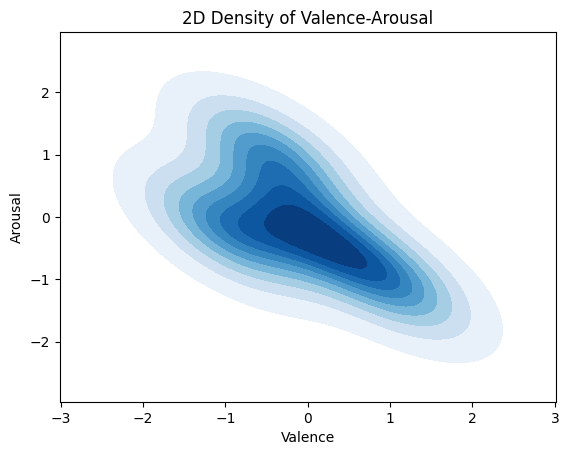

In [13]:
#2D Density/Contour Plot
sns.kdeplot(x=df['valence'], y=df['arousal'], fill=True, cmap='Blues')
plt.title('2D Density of Valence-Arousal')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

#### **2D Density/Contour Plot**
   - **Description:** Shows concentration of data points in the valence-arousal plane.
   - **Inference:** High-density regions indicate common emotional combinations; sparse areas show underrepresented emotions.

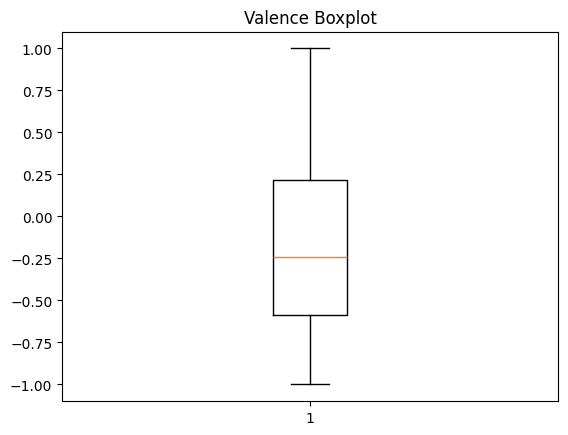

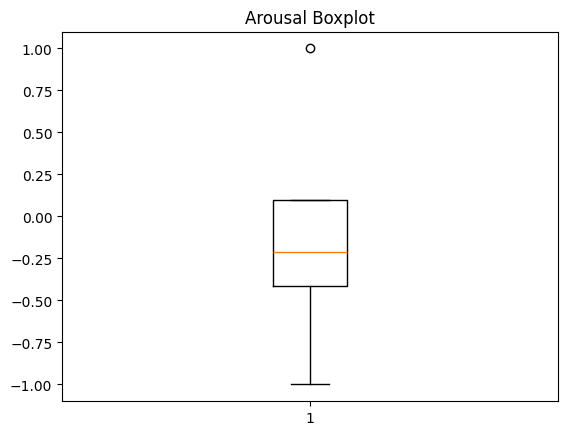

In [14]:
#Boxplots
plt.boxplot(df['valence'])
plt.title('Valence Boxplot')
plt.show()
plt.boxplot(df['arousal'])
plt.title('Arousal Boxplot')
plt.show()

#### **Boxplots**
   - **Description:** Summarize spread and highlight outliers for valence and arousal.
   - **Inference:** Box shows interquartile range, line is median, dots are outliers. Helps quickly assess variability and extremes.


# **Conclusion**
----------
This analysis visualizes and summarizes the emotional landscape of our labeled speech audio files in the valence-arousal space. The scatter plot and statistical summaries reveal whether our dataset is emotionally diverse or concentrated. Histograms and density plots show the distribution and frequency of emotional states, while boxplots highlight variability and outliers.

Possible conclusions:
- The dataset covers a broad/narrow range of emotions.
- Certain files cluster in specific emotional quadrants (e.g., high arousal/low valence).
- The feature extraction and normalization approach provides a quantitative basis for further emotion classification or synthesis.

Future work:
- Expand the dataset for greater diversity and balance.
- Use these quantitative labels to train machine learning models for emotion recognition.
- Explore additional or alternative acoustic features for improved emotion discrimination.


# **References**
----------
1. Russell, J. A. (1980). "A circumplex model of affect." Journal of Personality and Social Psychology, 39(6), 1161–1178. https://doi.org/10.1037/h0077714
2. Scherer, K. R. (2005). "What are emotions? And how can they be measured?" Social Science Information, 44(4), 695–729. https://doi.org/10.1177/0539018405058216
3. Eyben, F., Wöllmer, M., & Schuller, B. (2010). "openSMILE – The Munich Versatile and Fast Open-Source Audio Feature Extractor." Proceedings of the ACM Multimedia (MM), 1459–1462. https://doi.org/10.1145/1873951.1874246
4. Cowie, R., Douglas-Cowie, E., Savvidou, S., McMahon, E., Sawey, M., & Schröder, M. (2000). "'FEELTRACE': An instrument for recording perceived emotion in real time." ISCA Tutorial and Research Workshop (ITRW) on Speech and Emotion.
5. Livingstone, S. R., & Russo, F. A. (2018). "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English." PLoS ONE, 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391
6. McKeown, G., Valstar, M., Cowie, R., Pantic, M., & Schroder, M. (2012). "The SEMAINE Database: Annotated Multimodal Records of Emotionally Colored Conversations between a Person and a Limited Agent." IEEE Transactions on Affective Computing, 3(1), 5-17. https://doi.org/10.1109/T-AFFC.2011.20
